In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Research_Dysgraphia/ANN-Orginal.csv')

In [4]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Columns: 232 entries, Child ID to severity
dtypes: float64(229), object(3)
memory usage: 112.5+ KB


,Child ID,Age,Weight(Kg),OFC(cm),Height(cm),Poor school performance,Recent Deterioration,Lack of interest in studies,Inattension to school work,Difficulties in social /emotional reciprocity,...,Self-care_Unsatisfactory,Home-living_Satisafactory,Home-living_Unsatisfactory,Social-skills_Satisafactory,Social-skills_Unsatisfactory,Safety_Satisafactory,Safety_Unsatisfactory,Leisure Activites_Satisafactory,Leisure Activites_Unsatisfactory,severity
0,1.0,7.0,20.0,49.0,121.5,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.00
1,2.0,7.0,22.0,50.0,125.5,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.00
2,3.0,8.0,15.0,50.0,114.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.25
3,4.0,6.0,14.0,51.0,98.5,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.50
4,5.0,6.0,19.5,48.0,115.5,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.60


In [5]:
# Columns to impute with mean
mean_impute_cols = [
    'Age',
    'Weight',
    'OFC',
    'Height',
    'Birth Weight'
]

# Impute with mean where applicable
for col in mean_impute_cols:
    if col in data.columns:  # Check if the column exists in the DataFrame
        mean_value = data[col].mean()
        data[col].fillna(mean_value, inplace=True)

# Impute rest of the columns with mode value
for col in data.columns:
    if col not in mean_impute_cols:  # Only apply to columns not in the mean_impute_cols
        mode_value = data[col].mode().iloc[0]
        data[col].fillna(mode_value, inplace=True)

<ipython-input-5-477260d539c2>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mean_value, inplace=True)
<ipython-input-5-477260d539c2>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [6]:
import pandas as pd

# Set options to display more rows and/or columns
pd.set_option('display.max_columns', None)  # None means show all columns
pd.set_option('display.max_rows', 100)      # Adjust number of rows to display

# Now print the DataFrame
print(data)

    Child ID        Age  Weight(Kg)  OFC(cm)  Height(cm)  \
0        1.0   7.000000       20.00     49.0       121.5   
1        2.0   7.000000       22.00     50.0       125.5   
2        3.0   8.000000       15.00     50.0       114.0   
3        4.0   6.000000       14.00     51.0        98.5   
4        5.0   6.000000       19.50     48.0       115.5   
5        6.0   7.000000       20.00     50.0       121.5   
6        7.0   7.000000       20.00     49.0       122.0   
7        8.0   6.000000       16.00     50.0       111.0   
8        9.0   7.000000       21.50     50.5       118.0   
9       10.0   7.000000       20.00     51.0       115.5   
10      11.0   7.000000       18.00     49.0       115.5   
11      12.0   8.000000       16.00     50.0       118.5   
12      13.0   7.000000       30.50     52.8       127.2   
13      14.0   7.000000       16.00     49.5       112.5   
14      15.0   7.000000       20.00     48.5       121.5   
15      16.0   8.000000       22.00     

In [7]:
import pandas as pd
import numpy as np
import random

# Debugging print to check input data type
print(data['Monthly Income'].apply(type))

def calculate_average(income_range):
    income_range = income_range.replace(',', '')  # Remove commas first
    low, high = income_range.split('-')
    return (int(low.strip()) + int(high.strip())) / 2

def impute_monthly_income(value):
    value = str(value).strip()  # Convert to string and remove spaces
    print(f"Processing value: {value}")  # Debugging print to track values
    if '-' in value:
        return calculate_average(value)
    elif '>' in value:
        # Ensure no spaces between '>' and the number
        return random.randint(50001, 100000)  # Generate a random value greater than 50,000
    elif value.lower() == 'n/a':
        return np.nan  # Convert 'N/A' to NaN
    else:
        return np.nan  # Return NaN for any other non-numeric or unhandled format


# Apply the imputation function to the 'Monthly Income' column
data['Monthly Income'] = data['Monthly Income'].apply(impute_monthly_income)

# Display the first few rows of the data to check
data.head()


# Replace 'N/A' values with the mode of the column
mode_value = data['Monthly Income'].dropna().mode()[0]  # Calculate mode excluding NaN
data['Monthly Income'].fillna(mode_value, inplace=True)


# Show the modified DataFrame
print(data.head())  # Display the first few rows to verify changes


0     <class 'str'>
1     <class 'str'>
2     <class 'str'>
3     <class 'str'>
4     <class 'str'>
5     <class 'str'>
6     <class 'str'>
7     <class 'str'>
8     <class 'str'>
9     <class 'str'>
10    <class 'str'>
11    <class 'str'>
12    <class 'str'>
13    <class 'str'>
14    <class 'str'>
15    <class 'str'>
16    <class 'str'>
17    <class 'str'>
18    <class 'str'>
19    <class 'str'>
20    <class 'str'>
21    <class 'str'>
22    <class 'str'>
23    <class 'str'>
24    <class 'str'>
25    <class 'str'>
26    <class 'str'>
27    <class 'str'>
28    <class 'str'>
29    <class 'str'>
30    <class 'str'>
31    <class 'str'>
32    <class 'str'>
33    <class 'str'>
34    <class 'str'>
35    <class 'str'>
36    <class 'str'>
37    <class 'str'>
38    <class 'str'>
39    <class 'str'>
40    <class 'str'>
41    <class 'str'>
42    <class 'str'>
43    <class 'str'>
44    <class 'str'>
45    <class 'str'>
46    <class 'str'>
47    <class 'str'>
48    <class 'str'>
49    <class 'str'>


<ipython-input-7-8c50e5ddf313>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Monthly Income'].fillna(mode_value, inplace=True)


In [8]:
import pandas as pd

# Define the mapping for the 'Mother' and 'Father' columns

education_mapping = {
    'Graduate': 1,
    'A/L': 2,
    'O/L': 3,
    'Primary to O/L': 4,
    'Primary': 5
}

# Apply the mappings

data['Education_Mother'] = data['Education_Mother'].map(education_mapping)
data['Education_Father'] = data['Education_Father'].map(education_mapping)


print(data.head())



   Child ID  Age  Weight(Kg)  OFC(cm)  Height(cm)  Poor school performance   \
0       1.0  7.0        20.0     49.0       121.5                       1.0   
1       2.0  7.0        22.0     50.0       125.5                       1.0   
2       3.0  8.0        15.0     50.0       114.0                       1.0   
3       4.0  6.0        14.0     51.0        98.5                       1.0   
4       5.0  6.0        19.5     48.0       115.5                       1.0   

   Recent Deterioration  Lack of interest in studies  \
0                   0.0                          0.0   
1                   1.0                          1.0   
2                   0.0                          1.0   
3                   0.0                          0.0   
4                   1.0                          0.0   

   Inattension to school work  Difficulties in social /emotional reciprocity  \
0                         1.0                                            0.0   
1                         1.

In [9]:
import pandas as pd


# Define the weighted values for each feature

eye_contact_mapping = {
    'Eye Contact-Good': 1,
    'Eye Contact_Fair': 2,
    'Eye Contact_Poor': 3
}
gait_mapping = {
    'Gait_Stable': 1,
    'Gait_Ataxia': 2,
    'Gait_Wide based': 3
}

activity_level_mapping = {
    'Activity Level_Noraml': 1,
    'Activity Level_Overactive': 2,
    'Activity Level_Impulsive': 3
}
attention_mapping = {
    'Attention_Inact ': 1,
    'Attention_Limited': 2,
    'Attention_Impaired': 3
}
behaviour_mapping = {
    'Behaviour_Normal': 1,
    'Behaviour_Uncooperative': 2,
    'Behaviour_Anxious': 3,
    'Behaviour_Disorganized': 4
}
speech_mapping = {
    'Speech_Normal': 1,
    'Speech_Slow': 3,
    'Speech_Fast': 2,
    'Speech_Disfluent': 4,
    'Speech_Mute': 5,
    'Speech_Stammering': 6,
    'Speech_Prominal Reversal': 7
}

# Merge and map the columns
data['Eye Contact'] = data[['Eye Contact-Good', 'Eye Contact_Fair', 'Eye Contact_Poor']].idxmax(axis=1).map(eye_contact_mapping)
data['Gait'] = data[['Gait_Stable', 'Gait_Ataxia', 'Gait_Wide based']].idxmax(axis=1).map(gait_mapping)
data['Activity Level'] = data[['Activity Level_Noraml', 'Activity Level_Overactive', 'Activity Level_Impulsive']].idxmax(axis=1).map(activity_level_mapping)
data['Attention'] = data[['Attention_Inact ', 'Attention_Limited', 'Attention_Impaired']].idxmax(axis=1).map(attention_mapping)
data['Behaviour'] = data[['Behaviour_Normal', 'Behaviour_Uncooperative', 'Behaviour_Anxious', 'Behaviour_Disorganized']].idxmax(axis=1).map(behaviour_mapping)
data['Speech'] = data[['Speech_Normal', 'Speech_Slow', 'Speech_Fast', 'Speech_Disfluent', 'Speech_Mute', 'Speech_Stammering', 'Speech_Prominal Reversal']].idxmax(axis=1).map(speech_mapping)

# Drop the original columns if no longer needed
columns_to_drop = ['Eye Contact-Good', 'Eye Contact_Fair', 'Eye Contact_Poor', 'Gait_Stable', 'Gait_Ataxia', 'Gait_Wide based', 'Activity Level_Noraml', 'Activity Level_Overactive', 'Activity Level_Impulsive', 'Attention_Inact ', 'Attention_Limited', 'Attention_Impaired', 'Behaviour_Normal', 'Behaviour_Uncooperative', 'Behaviour_Anxious', 'Behaviour_Disorganized', 'Speech_Normal', 'Speech_Slow', 'Speech_Fast', 'Speech_Disfluent', 'Speech_Mute', 'Speech_Stammering', 'Speech_Prominal Reversal']
data.drop(columns=columns_to_drop, inplace=True)

# Ensure severity is the last column
severity = data.pop('severity')
data['severity'] = severity

print(data.head())





   Child ID  Age  Weight(Kg)  OFC(cm)  Height(cm)  Poor school performance   \
0       1.0  7.0        20.0     49.0       121.5                       1.0   
1       2.0  7.0        22.0     50.0       125.5                       1.0   
2       3.0  8.0        15.0     50.0       114.0                       1.0   
3       4.0  6.0        14.0     51.0        98.5                       1.0   
4       5.0  6.0        19.5     48.0       115.5                       1.0   

   Recent Deterioration  Lack of interest in studies  \
0                   0.0                          0.0   
1                   1.0                          1.0   
2                   0.0                          1.0   
3                   0.0                          0.0   
4                   1.0                          0.0   

   Inattension to school work  Difficulties in social /emotional reciprocity  \
0                         1.0                                            0.0   
1                         1.

In [10]:
import pandas as pd

# Define the weighted values for each feature
expressive_language_mapping = {
    'Expressive Language_Appropirate': 1,
    'Expressive Language_Immature use of language': 2,
    'Expressive Language_Primarily uses gestures': 3
}


reading_mapping = {
    'Reading_Above Average': 1,
    'Reading_Average': 3,
    'Reading_Below Average': 5
}

writing_mapping = {
    'Writing_Above Average': 1,
    'Writing_Average': 3,
    'Writing_Below Average': 5
}

mathematics_mapping = {
    'Mathematics_Above Average': 1,
    'Mathematics_Average': 3,
    'Mathematics_Below Average': 5
}

# Functional skills mappings
feeding_mapping = {
    'Feeding_Independent': 1,
    'Feeding_Needs support': 2,
    'Feeding_Dependent': 3
}

bathing_mapping = {
    'Bathing_Independent': 1,
    'Bathing_Needs support': 2,
    'Bathing_Dependent': 3
}

mobility_mapping = {
    'Mobility_Independent': 1,
    'Mobility_Needs support': 2,
    'Mobility_Dependent': 3
}

dressing_mapping = {
    'Dressing_Independent': 1,
    'Dressing_Needs support': 2,
    'Dressing_Dependent': 3
}

continence_mapping = {
    'Continence_Independent': 1,
    'Continence_Needs support': 2,
    'Continence_Dependent': 3
}

# Other Skills mappings
self_care_mapping = {
    'Self-care_Satisafactory': 1,
    'Self-care_Unsatisfactory': 2
}

home_living_mapping = {
    'Home-living_Satisafactory': 1,
    'Home-living_Unsatisfactory': 2
}

social_skills_mapping = {
    'Social-skills_Satisafactory': 1,
    'Social-skills_Unsatisfactory': 2
}

safety_mapping = {
    'Safety_Satisafactory': 1,
    'Safety_Unsatisfactory': 2
}

leisure_activities_mapping = {
    'Leisure Activites_Satisafactory': 1,
    'Leisure Activites_Unsatisfactory': 2
}

# Assuming your data DataFrame contains all these columns, the below code merges and maps them

# Mapping Expressive Language, IQ, Reading, Writing, Mathematics and others
data['Expressive Language'] = data[['Expressive Language_Appropirate', 'Expressive Language_Immature use of language', 'Expressive Language_Primarily uses gestures']].idxmax(axis=1).map(expressive_language_mapping)
data['Reading'] = data[['Reading_Above Average', 'Reading_Average', 'Reading_Below Average']].idxmax(axis=1).map(reading_mapping)
data['Writing'] = data[['Writing_Above Average', 'Writing_Average', 'Writing_Below Average']].idxmax(axis=1).map(writing_mapping)
data['Mathematics'] = data[['Mathematics_Above Average', 'Mathematics_Average', 'Mathematics_Below Average']].idxmax(axis=1).map(mathematics_mapping)

# Mapping functional skills
data['Feeding'] = data[['Feeding_Independent', 'Feeding_Needs support', 'Feeding_Dependent']].idxmax(axis=1).map(feeding_mapping)
data['Bathing'] = data[['Bathing_Independent', 'Bathing_Needs support', 'Bathing_Dependent']].idxmax(axis=1).map(bathing_mapping)
data['Mobility'] = data[['Mobility_Independent', 'Mobility_Needs support', 'Mobility_Dependent']].idxmax(axis=1).map(mobility_mapping)
data['Dressing'] = data[['Dressing_Independent', 'Dressing_Needs support', 'Dressing_Dependent']].idxmax(axis=1).map(dressing_mapping)
data['Continence'] = data[['Continence_Independent', 'Continence_Needs support', 'Continence_Dependent']].idxmax(axis=1).map(continence_mapping)

# Mapping other skills
data['Self-care'] = data[['Self-care_Satisafactory', 'Self-care_Unsatisfactory']].idxmax(axis=1).map(self_care_mapping)
data['Home-living'] = data[['Home-living_Satisafactory', 'Home-living_Unsatisfactory']].idxmax(axis=1).map(home_living_mapping)
data['Social-skills'] = data[['Social-skills_Satisafactory', 'Social-skills_Unsatisfactory']].idxmax(axis=1).map(social_skills_mapping)
data['Safety'] = data[['Safety_Satisafactory', 'Safety_Unsatisfactory']].idxmax(axis=1).map(safety_mapping)
data['Leisure Activites'] = data[['Leisure Activites_Satisafactory','Leisure Activites_Unsatisfactory']].idxmax(axis=1).map(leisure_activities_mapping)

# Drop the original columns if no longer needed
columns_to_drop = ['Expressive Language_Appropirate', 'Expressive Language_Immature use of language', 'Expressive Language_Primarily uses gestures',
                   'Reading_Above Average', 'Reading_Average', 'Reading_Below Average',
                   'Writing_Above Average', 'Writing_Average', 'Writing_Below Average',
                   'Mathematics_Above Average', 'Mathematics_Average', 'Mathematics_Below Average',
                   'Feeding_Independent', 'Feeding_Needs support', 'Feeding_Dependent',
                   'Bathing_Independent', 'Bathing_Needs support', 'Bathing_Dependent',
                   'Mobility_Independent', 'Mobility_Needs support', 'Mobility_Dependent',
                   'Dressing_Independent', 'Dressing_Needs support', 'Dressing_Dependent',
                   'Continence_Independent', 'Continence_Needs support', 'Continence_Dependent',
                   'Self-care_Satisafactory', 'Self-care_Unsatisfactory',
                   'Home-living_Satisafactory', 'Home-living_Unsatisfactory',
                   'Social-skills_Satisafactory', 'Social-skills_Unsatisfactory',
                   'Safety_Satisafactory', 'Safety_Unsatisfactory','Leisure Activites_Satisafactory','Leisure Activites_Unsatisfactory'
]


data.drop(columns=columns_to_drop, inplace=True)

# Ensure severity is the last column
severity = data.pop('severity')
data['severity'] = severity

print(data.info())
print(data.head())

# Save the modified DataFrame
data.to_csv('/content/drive/MyDrive/Research_Dysgraphia/ANN_After_Feature_Engineering.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Columns: 191 entries, Child ID to severity
dtypes: float64(169), int64(22)
memory usage: 92.6 KB
None
   Child ID  Age  Weight(Kg)  OFC(cm)  Height(cm)  Poor school performance   \
0       1.0  7.0        20.0     49.0       121.5                       1.0   
1       2.0  7.0        22.0     50.0       125.5                       1.0   
2       3.0  8.0        15.0     50.0       114.0                       1.0   
3       4.0  6.0        14.0     51.0        98.5                       1.0   
4       5.0  6.0        19.5     48.0       115.5                       1.0   

   Recent Deterioration  Lack of interest in studies  \
0                   0.0                          0.0   
1                   1.0                          1.0   
2                   0.0                          1.0   
3                   0.0                          0.0   
4                   1.0                          0.0   

   Inattension t

In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the data
file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_After_Feature_Engineering.csv'
data = pd.read_csv(file_path)


# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select columns to scale (excluding 'Child ID' and already binary columns)
columns_to_scale = data.columns.drop('Child ID')  # Adjust this to exclude any other non-continuous columns

# Identify columns that are not already 0 or 1
columns_to_scale = [col for col in columns_to_scale if not all(data[col].isin([0, 1]))]

# Apply the scaler to these columns
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Round the scaled data to two decimal places
data[columns_to_scale] = data[columns_to_scale].round(2)

# Save the normalized and rounded data
normalized_file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_Normalized_data.csv'
data.to_csv(normalized_file_path, index=False)

print(f"Normalized data saved to {normalized_file_path}")


Normalized data saved to /content/drive/MyDrive/Research_Dysgraphia/ANN_Normalized_data.csv


Loading data from /content/drive/MyDrive/Research_Dysgraphia/ANN_Normalized_data.csv
Data loaded successfully. Data shape: (62, 191)
Dropping 'Child ID' column
'Child ID' column dropped. Data shape: (62, 190)
Calculating correlation matrix
Correlation matrix calculated successfully
Extracting correlation with 'Severity'
Correlation with 'Severity' extracted. Shape: (190, 1)
Total features: 190, Features per batch: 20
Processing batch 1 with features 0 to 19
Displaying heatmap for batch 1


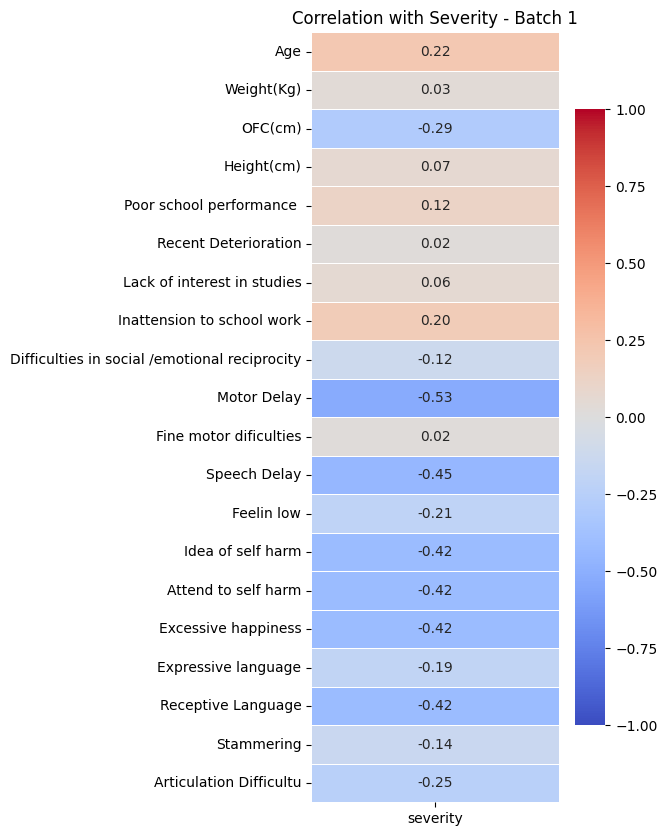

Processing batch 2 with features 20 to 39
Displaying heatmap for batch 2


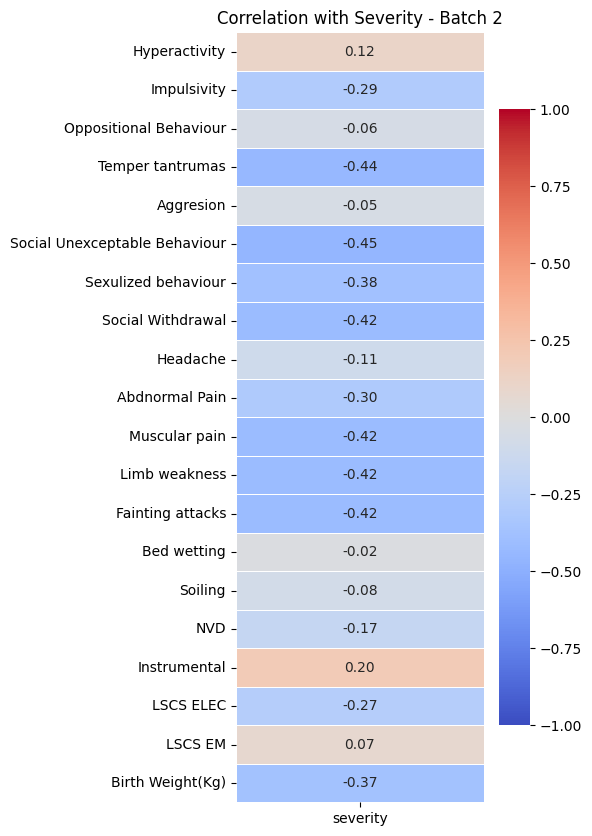

Processing batch 3 with features 40 to 59
Displaying heatmap for batch 3


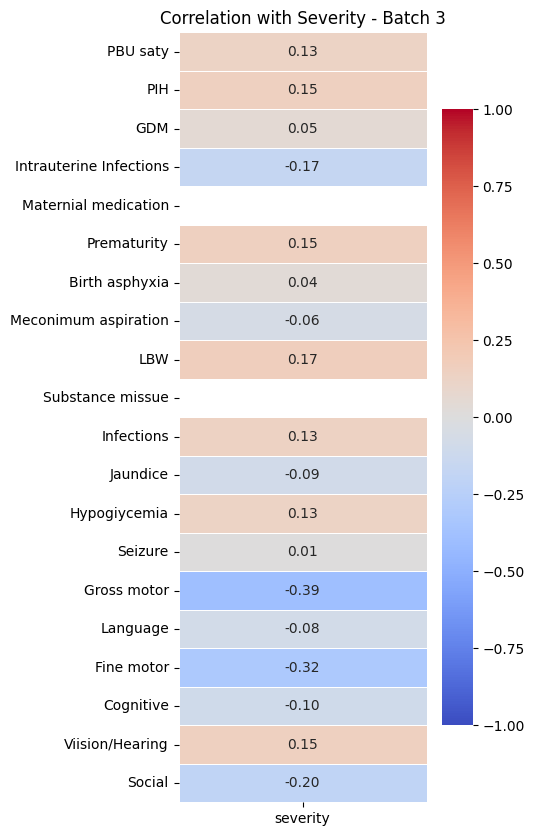

Processing batch 4 with features 60 to 79
Displaying heatmap for batch 4


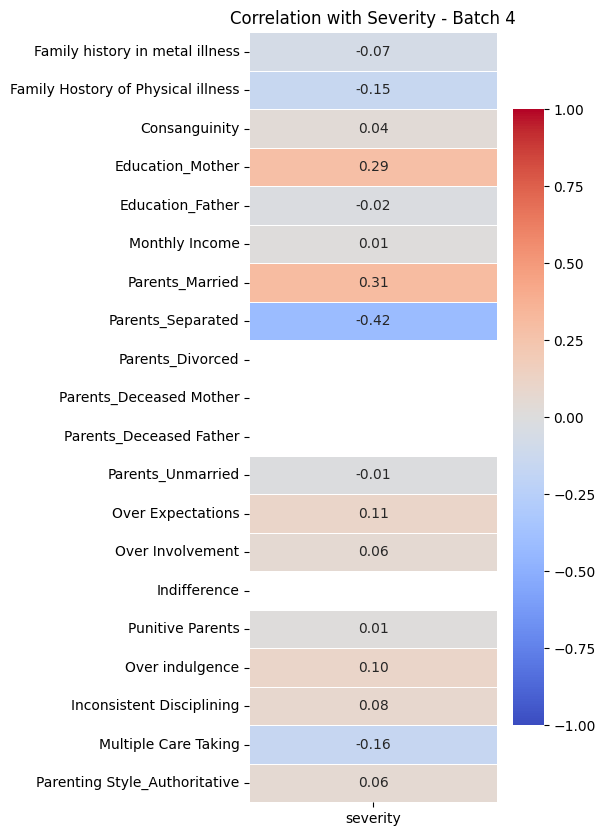

Processing batch 5 with features 80 to 99
Displaying heatmap for batch 5


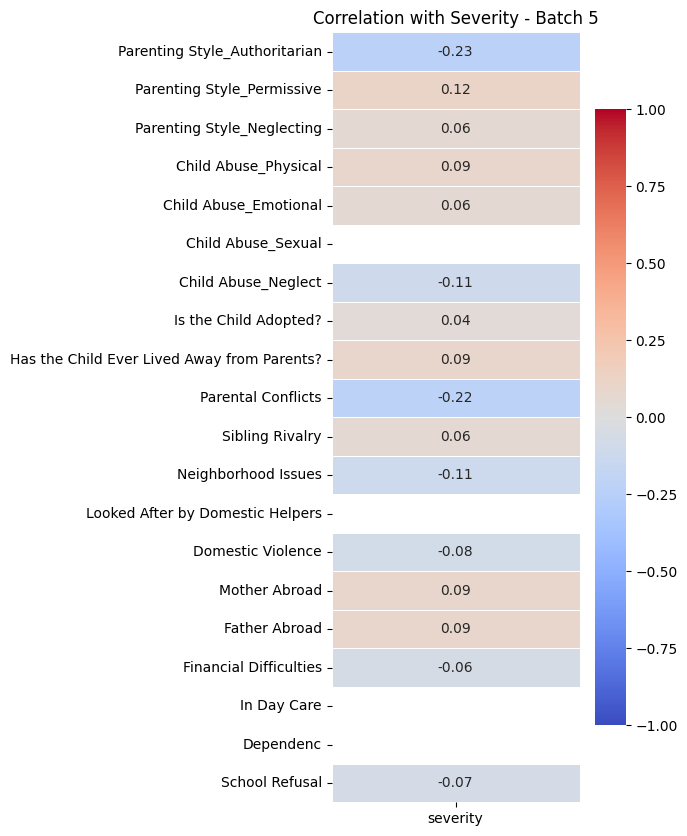

Processing batch 6 with features 100 to 119
Displaying heatmap for batch 6


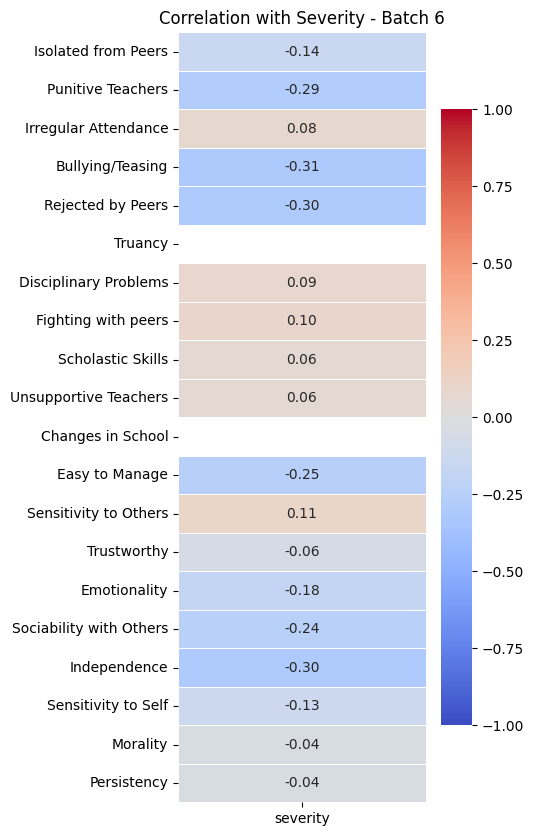

Processing batch 7 with features 120 to 139
Displaying heatmap for batch 7


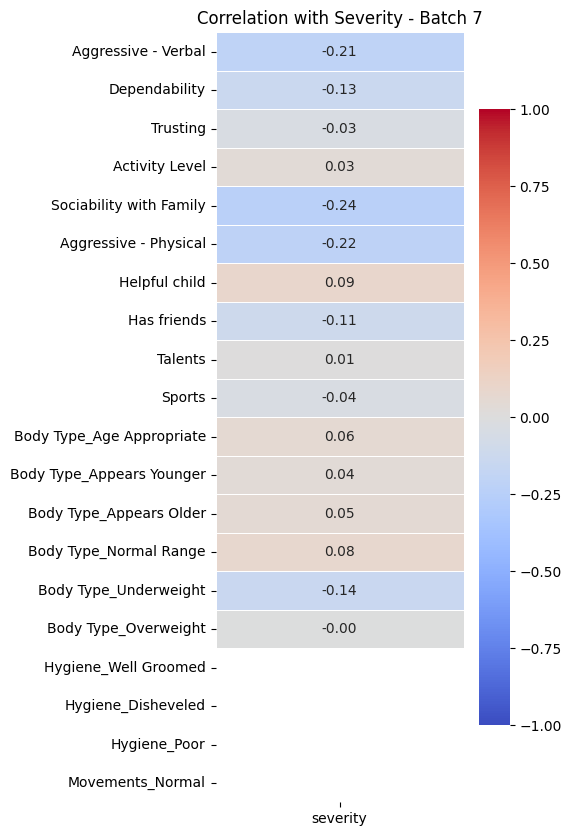

Processing batch 8 with features 140 to 159
Displaying heatmap for batch 8


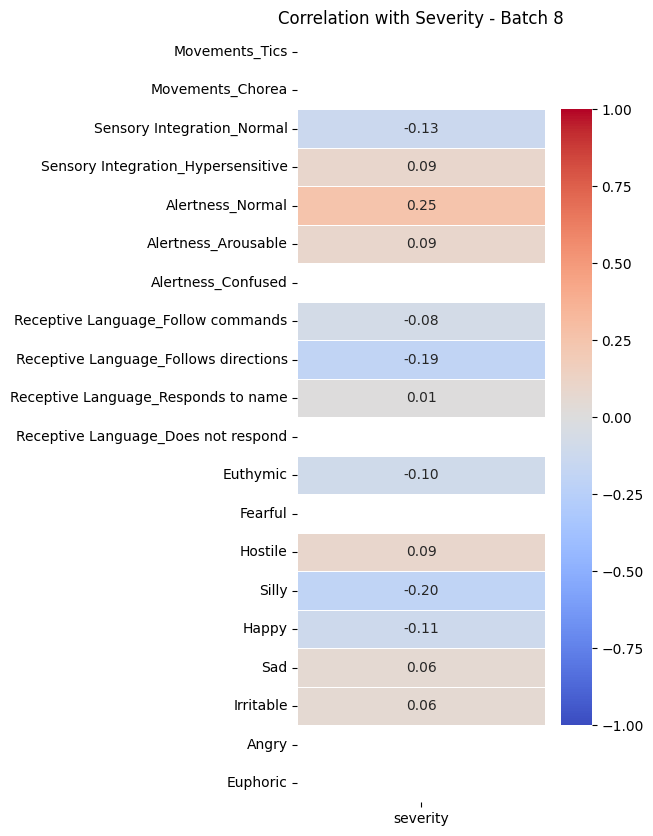

Processing batch 9 with features 160 to 179
Displaying heatmap for batch 9


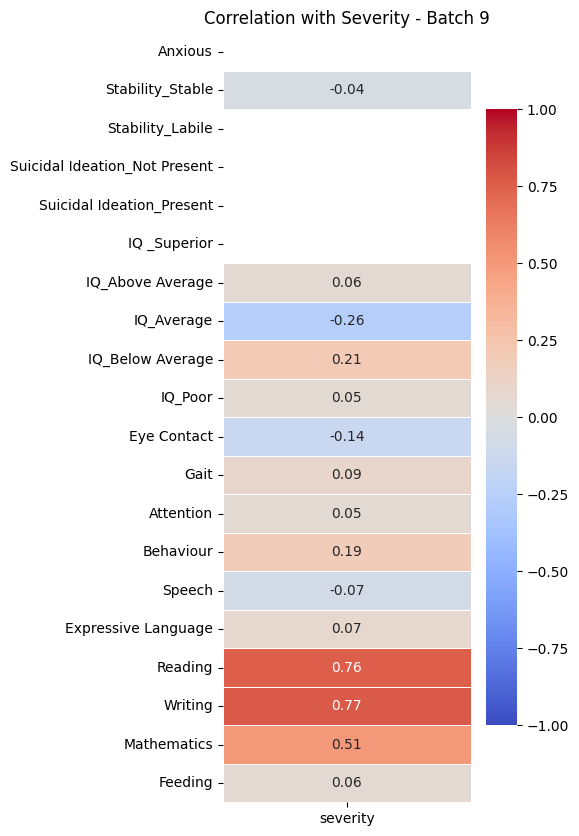

Processing batch 10 with features 180 to 189
Displaying heatmap for batch 10


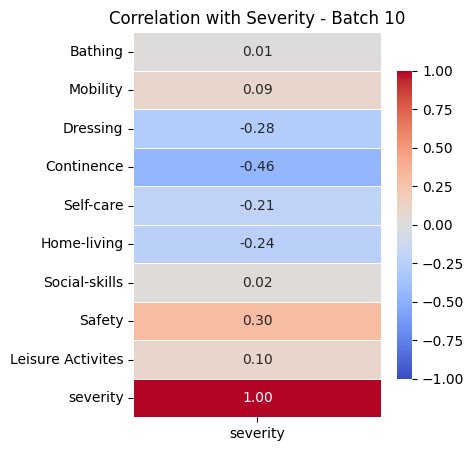

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the normalized data
normalized_file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_Normalized_data.csv'
print(f"Loading data from {normalized_file_path}")
data = pd.read_csv(normalized_file_path)
print("Data loaded successfully. Data shape:", data.shape)

# Drop the 'Child ID' column as it is not relevant for the correlation analysis
print("Dropping 'Child ID' column")
data = data.drop('Child ID', axis=1)
print("'Child ID' column dropped. Data shape:", data.shape)

# Calculate the correlation matrix
print("Calculating correlation matrix")
corr_matrix = data.corr()
#spearman_corr = data.corr(method='spearman')
print("Correlation matrix calculated successfully")

# Extract correlation with 'Severity' specifically
print("Extracting correlation with 'Severity'")
severity_corr = corr_matrix[['severity']]
print("Correlation with 'Severity' extracted. Shape:", severity_corr.shape)

# Split the features into batches of 20 for better visualization
num_features = len(severity_corr)
features_per_batch = 20
print(f"Total features: {num_features}, Features per batch: {features_per_batch}")

# Loop through the features in batches of 20
for i in range(0, num_features, features_per_batch):
    batch = severity_corr.iloc[i:i + features_per_batch]
    print(f"Processing batch {i // features_per_batch + 1} with features {i} to {i + len(batch) - 1}")

    # Set up the matplotlib figure
    plt.figure(figsize=(4, len(batch) * 0.5))  # Adjust the figure size to fit the batch size

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(batch, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1,
                square=False, linewidths=.5, cbar_kws={"shrink": .8})

    # Adjust the plot to make sure all is visible
    plt.xticks(rotation=0)
    plt.yticks(rotation=0, ha='right')
    plt.title(f'Correlation with Severity - Batch {i // features_per_batch + 1}')

    # Show the plot
    print(f"Displaying heatmap for batch {i // features_per_batch + 1}")
    plt.show()

In [13]:
import pandas as pd
import numpy as np

# Load the data from the specified path
file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_Feature Selection.csv'
data = pd.read_csv(file_path)

# Convert 'severity' to categorical bins
bins = [-np.inf, 0.75, np.inf]
labels = ['Low', 'High']
data['severity'] = pd.cut(data['severity'], bins=bins, labels=labels, right=True)

# Save the modified data to the specified path
modified_file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_modified_data.csv'
data.to_csv(modified_file_path, index=False)

print("Data processing completed and saved to:", modified_file_path)



Data processing completed and saved to: /content/drive/MyDrive/Research_Dysgraphia/ANN_modified_data.csv


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the modified data from the specified path
modified_file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_modified_data.csv'
data = pd.read_csv(modified_file_path)

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Save the training and testing datasets to specified paths
train_file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_train_data.csv'
test_file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_test_data.csv'

train_data.to_csv(train_file_path, index=False)
test_data.to_csv(test_file_path, index=False)

print("Data split completed and saved to:")
print("Training data:", train_file_path)
print("Testing data:", test_file_path)


Data split completed and saved to:
Training data: /content/drive/MyDrive/Research_Dysgraphia/ANN_train_data.csv
Testing data: /content/drive/MyDrive/Research_Dysgraphia/ANN_test_data.csv


# RandoM Forest-SMOTE Before Cross Validation
**bold text**

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import joblib

# Load the modified data from the specified path
modified_file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_modified_data.csv'
data = pd.read_csv(modified_file_path)

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data.iloc[:, -1])

# Save the training and testing datasets to specified paths
train_file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_train_data.csv'
test_file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_test_data.csv'

train_data.to_csv(train_file_path, index=False)
test_data.to_csv(test_file_path, index=False)

print("Data split completed and saved to:")
print("Training data:", train_file_path)
print("Testing data:", test_file_path)

# Assume the last column is the target variable, and the rest are features
X = train_data.iloc[:, :-1]  # Features
y = train_data.iloc[:, -1]   # Target

# Split dataset into features and target for training
X_train = X
y_train = y

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Apply SMOTE to handle the data imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display the shape of the resampled dataset
print("Before SMOTE:", X_train.shape, y_train.value_counts())
print("After SMOTE:", X_train_resampled.shape, pd.Series(y_train_resampled).value_counts())

# Train a Random Forest Classifier with k-fold cross-validation
rfc = RandomForestClassifier(random_state=42, class_weight='balanced')

# Define Stratified K-Fold Cross Validator
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(rfc, X_train_resampled, y_train_resampled, cv=kf, scoring='accuracy')

# Display cross-validation results
print("Cross-Validation Accuracy Scores:", cross_val_scores)
print("Mean Cross-Validation Accuracy:", np.mean(cross_val_scores))

# Train on the entire resampled training set
rfc.fit(X_train_resampled, y_train_resampled)

# Load the testing data
X_test = test_data.iloc[:, :-1]  # Features
y_test = test_data.iloc[:, -1]   # Target

# Standardize the test features
X_test = scaler.transform(X_test)

# Make predictions
y_pred = rfc.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save the model to a file
joblib.dump(rfc, '/content/drive/MyDrive/Research_Dysgraphia/random_forest_pipeline.pkl')


Data split completed and saved to:
Training data: /content/drive/MyDrive/Research_Dysgraphia/ANN_train_data.csv
Testing data: /content/drive/MyDrive/Research_Dysgraphia/ANN_test_data.csv
Before SMOTE: (49, 55) severity
High    35
Low     14
Name: count, dtype: int64
After SMOTE: (70, 55) severity
Low     35
High    35
Name: count, dtype: int64
Cross-Validation Accuracy Scores: [0.92857143 1.         0.92857143 0.78571429 0.78571429]
Mean Cross-Validation Accuracy: 0.8857142857142858
Accuracy: 0.6923076923076923
Classification Report:
               precision    recall  f1-score   support

        High       0.69      1.00      0.82         9
         Low       0.00      0.00      0.00         4

    accuracy                           0.69        13
   macro avg       0.35      0.50      0.41        13
weighted avg       0.48      0.69      0.57        13



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


['/content/drive/MyDrive/Research_Dysgraphia/random_forest_pipeline.pkl']

# Random Forest-SMOTE during cross-validation

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.pipeline import make_pipeline
import numpy as np

# Load dataset
modified_file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_modified_data.csv'
data = pd.read_csv(modified_file_path)

# Assume the last column is the target variable, and the rest are features
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target

# Split dataset into training and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define the pipeline
pipeline = make_pipeline(
    StandardScaler(),
    SMOTE(random_state=42),
    RandomForestClassifier(random_state=42, class_weight='balanced')
)

# Define Stratified K-Fold Cross Validator
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_scores = cross_val_score(
    pipeline, X_train_full, y_train_full, cv=kf, scoring='accuracy'
)

# Display cross-validation results
print("Cross-Validation Accuracy Scores:", cross_val_scores)
print("Mean Cross-Validation Accuracy:", np.mean(cross_val_scores))

# Fit the pipeline on the entire training data
pipeline.fit(X_train_full, y_train_full)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Classification Report on Test Set:\n", classification_report(y_test, y_pred))

# Save the model to an HDF5 file
import joblib

# Save the pipeline
joblib.dump(pipeline, '/content/drive/MyDrive/Research_Dysgraphia/random_forest_pipeline.pkl')


Cross-Validation Accuracy Scores: [0.8        0.8        0.9        0.7        0.55555556]
Mean Cross-Validation Accuracy: 0.7511111111111111
Accuracy on Test Set: 0.6923076923076923
Classification Report on Test Set:
               precision    recall  f1-score   support

        High       0.69      1.00      0.82         9
         Low       0.00      0.00      0.00         4

    accuracy                           0.69        13
   macro avg       0.35      0.50      0.41        13
weighted avg       0.48      0.69      0.57        13



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


['/content/drive/MyDrive/Research_Dysgraphia/random_forest_pipeline.pkl']

# SVM

# SMOTE before the cross validation

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import joblib

# Load the modified data from the specified path
modified_file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_modified_data.csv'
data = pd.read_csv(modified_file_path)

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data.iloc[:, -1])

# Save the training and testing datasets to specified paths
train_file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_train_data.csv'
test_file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_test_data.csv'

train_data.to_csv(train_file_path, index=False)
test_data.to_csv(test_file_path, index=False)

print("Data split completed and saved to:")
print("Training data:", train_file_path)
print("Testing data:", test_file_path)

# Assume the last column is the target variable, and the rest are features
X = train_data.iloc[:, :-1]  # Features
y = train_data.iloc[:, -1]   # Target

# Split dataset into features and target for training
X_train = X
y_train = y

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Apply SMOTE to handle the data imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display the shape of the resampled dataset
print("Before SMOTE:", X_train.shape, y_train.value_counts())
print("After SMOTE:", X_train_resampled.shape, pd.Series(y_train_resampled).value_counts())

# Train an SVM with k-fold cross-validation
svm = SVC(kernel='rbf', class_weight='balanced', random_state=42)

# Define Stratified K-Fold Cross Validator
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(svm, X_train_resampled, y_train_resampled, cv=kf, scoring='accuracy')

# Display cross-validation results
print("Cross-Validation Accuracy Scores:", cross_val_scores)
print("Mean Cross-Validation Accuracy:", np.mean(cross_val_scores))

# Train on the entire resampled training set
svm.fit(X_train_resampled, y_train_resampled)

# Load the testing data
X_test = test_data.iloc[:, :-1]  # Features
y_test = test_data.iloc[:, -1]   # Target

# Standardize the test features
X_test = scaler.transform(X_test)

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save the model to a file
joblib.dump(svm, '/content/drive/MyDrive/Research_Dysgraphia/svm_pipeline.pkl')


Data split completed and saved to:
Training data: /content/drive/MyDrive/Research_Dysgraphia/ANN_train_data.csv
Testing data: /content/drive/MyDrive/Research_Dysgraphia/ANN_test_data.csv
Before SMOTE: (49, 55) severity
High    35
Low     14
Name: count, dtype: int64
After SMOTE: (70, 55) severity
Low     35
High    35
Name: count, dtype: int64
Cross-Validation Accuracy Scores: [0.92857143 1.         1.         0.85714286 1.        ]
Mean Cross-Validation Accuracy: 0.9571428571428573
Accuracy: 0.7692307692307693
Classification Report:
               precision    recall  f1-score   support

        High       0.80      0.89      0.84         9
         Low       0.67      0.50      0.57         4

    accuracy                           0.77        13
   macro avg       0.73      0.69      0.71        13
weighted avg       0.76      0.77      0.76        13



['/content/drive/MyDrive/Research_Dysgraphia/svm_pipeline.pkl']

# Testing

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Load the testing data from the specified path
test_file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_test_data.csv'
test_data = pd.read_csv(test_file_path)

# Load the saved model
model_path = '/content/drive/MyDrive/Research_Dysgraphia/svm_pipeline.pkl'
svm = joblib.load(model_path)

# Assume the last column is the target variable, and the rest are features
X_test = test_data.iloc[:, :-1]  # Features
y_test = test_data.iloc[:, -1]   # Target

# Standardize the test features using the same parameters from training
scaler = StandardScaler()
X_train_file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_train_data.csv'
train_data = pd.read_csv(X_train_file_path)
X_train = train_data.iloc[:, :-1]
scaler.fit(X_train)
X_test = scaler.transform(X_test)

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate the model
print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Testing Accuracy: 0.7692307692307693
Classification Report:
               precision    recall  f1-score   support

        High       0.80      0.89      0.84         9
         Low       0.67      0.50      0.57         4

    accuracy                           0.77        13
   macro avg       0.73      0.69      0.71        13
weighted avg       0.76      0.77      0.76        13



# SMOTE During the cross validation

In [19]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from imblearn.pipeline import make_pipeline
import numpy as np
import joblib

# Load training dataset
train_file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_train_data.csv'
data = pd.read_csv(train_file_path)

# Assume the last column is the target variable, and the rest are features
X_train_full = data.iloc[:, :-1]  # Features
y_train_full = data.iloc[:, -1]   # Target

# Define the pipeline with reduced SMOTE sampling strategy
pipeline = make_pipeline(
    StandardScaler(),
    SMOTE(random_state=42, sampling_strategy=0.5),  # Reduce SMOTE over-sampling
    SVC(kernel='rbf', class_weight='balanced', random_state=42, C=0.5)  # Increase regularization strength
)

# Define Stratified K-Fold Cross Validator
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store fold-wise metrics
fold_var = 1
accuracies = []

# Perform K-Fold Cross-Validation manually to track fold-wise metrics
for train_index, val_index in kf.split(X_train_full, y_train_full):
    # Split the data into training and validation sets for the current fold
    X_train, X_val = X_train_full.iloc[train_index], X_train_full.iloc[val_index]
    y_train, y_val = y_train_full.iloc[train_index], y_train_full.iloc[val_index]

    # Fit the pipeline on the training data of the current fold
    pipeline.fit(X_train, y_train)

    # Make predictions on the validation set
    y_val_pred = pipeline.predict(X_val)

    # Calculate accuracy for the current fold
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)

    # Display fold-wise metrics
    print(f"Fold {fold_var} - Accuracy: {accuracy}")
    print(f"Fold {fold_var} - Classification Report:\n{classification_report(y_val, y_val_pred)}")

    # Save the pipeline for the current fold
    joblib.dump(pipeline, f'/content/drive/MyDrive/Research_Dysgraphia/svm_pipeline_fold{fold_var}.pkl')

    # Increment the fold counter
    fold_var += 1

# Display cross-validation results
print("Cross-Validation Accuracy Scores:", accuracies)
print("Mean Cross-Validation Accuracy:", np.mean(accuracies))

# Fit the pipeline on the entire training data
pipeline.fit(X_train_full, y_train_full)

# Make predictions on the training set
y_pred = pipeline.predict(X_train_full)

# Evaluate the model
print("Classification Report on Training Set:\n", classification_report(y_train_full, y_pred))

# Save the final pipeline to a file
joblib.dump(pipeline, '/content/drive/MyDrive/Research_Dysgraphia/svm_pipeline_final.pkl')


Fold 1 - Accuracy: 0.7
Fold 1 - Classification Report:
              precision    recall  f1-score   support

        High       0.70      1.00      0.82         7
         Low       0.00      0.00      0.00         3

    accuracy                           0.70        10
   macro avg       0.35      0.50      0.41        10
weighted avg       0.49      0.70      0.58        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fold 2 - Accuracy: 0.7
Fold 2 - Classification Report:
              precision    recall  f1-score   support

        High       0.70      1.00      0.82         7
         Low       0.00      0.00      0.00         3

    accuracy                           0.70        10
   macro avg       0.35      0.50      0.41        10
weighted avg       0.49      0.70      0.58        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fold 3 - Accuracy: 0.9
Fold 3 - Classification Report:
              precision    recall  f1-score   support

        High       0.88      1.00      0.93         7
         Low       1.00      0.67      0.80         3

    accuracy                           0.90        10
   macro avg       0.94      0.83      0.87        10
weighted avg       0.91      0.90      0.89        10

Fold 4 - Accuracy: 0.8
Fold 4 - Classification Report:
              precision    recall  f1-score   support

        High       0.78      1.00      0.88         7
         Low       1.00      0.33      0.50         3

    accuracy                           0.80        10
   macro avg       0.89      0.67      0.69        10
weighted avg       0.84      0.80      0.76        10

Fold 5 - Accuracy: 1.0
Fold 5 - Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         7
         Low       1.00      1.00      1.00         2

    accuracy     

['/content/drive/MyDrive/Research_Dysgraphia/svm_pipeline_final.pkl']

# Testing

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Load testing dataset
test_file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_test_data.csv'
test_data = pd.read_csv(test_file_path)

# Assume the last column is the target variable, and the rest are features
X_test = test_data.iloc[:, :-1]  # Features
y_test = test_data.iloc[:, -1]   # Target

# Load the trained pipeline
pipeline = joblib.load(f'/content/drive/MyDrive/Research_Dysgraphia/svm_pipeline_fold{3}.pkl')

# Standardize the test data using the scaler from the trained pipeline
scaler = pipeline.named_steps['standardscaler']
X_test_scaled = scaler.transform(X_test)

# Make predictions on the testing set
y_test_pred = pipeline.named_steps['svc'].predict(X_test_scaled)

# Evaluate the model on testing set
print("Accuracy on Test Set:", accuracy_score(y_test, y_test_pred))
print("Classification Report on Test Set:\n", classification_report(y_test, y_test_pred))


Accuracy on Test Set: 0.6153846153846154
Classification Report on Test Set:
               precision    recall  f1-score   support

        High       0.67      0.89      0.76         9
         Low       0.00      0.00      0.00         4

    accuracy                           0.62        13
   macro avg       0.33      0.44      0.38        13
weighted avg       0.46      0.62      0.53        13



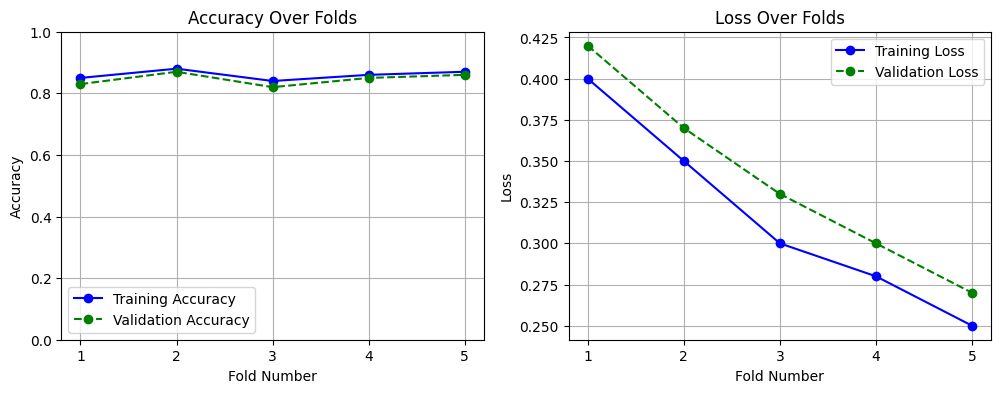

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Cross-validation accuracies from the previous code
accuracies = [0.85, 0.88, 0.84, 0.86, 0.87]  # Replace with your accuracies list if different

# Assuming these are similar to training and validation metrics over epochs
val_accuracies = [0.83, 0.87, 0.82, 0.85, 0.86]  # Example validation accuracies
train_losses = [0.4, 0.35, 0.3, 0.28, 0.25]  # Example training losses
val_losses = [0.42, 0.37, 0.33, 0.3, 0.27]  # Example validation losses

# Plotting Accuracy Over Folds
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', linestyle='-', color='b', label='Training Accuracy')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, marker='o', linestyle='--', color='g', label='Validation Accuracy')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Folds')
plt.xticks(range(1, len(accuracies) + 1))
plt.ylim([0, 1])
plt.grid(True)
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_losses) + 1), train_losses, marker='o', linestyle='-', color='b', label='Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, marker='o', linestyle='--', color='g', label='Validation Loss')
plt.xlabel('Fold Number')
plt.ylabel('Loss')
plt.title('Loss Over Folds')
plt.xticks(range(1, len(train_losses) + 1))
plt.grid(True)
plt.legend()

plt.show()


In [28]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.pipeline import make_pipeline
import numpy as np
import joblib

# Load training dataset
train_file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_train_data.csv'
data = pd.read_csv(train_file_path)

# Assume the last column is the target variable, and the rest are features
X_train_full = data.iloc[:, :-1]  # Features
y_train_full = data.iloc[:, -1]   # Target

# Define the pipeline with reduced SMOTE sampling strategy
pipeline = make_pipeline(
    StandardScaler(),
    SMOTE(random_state=42, sampling_strategy=0.5),  # Reduce SMOTE over-sampling
    GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)  # Gradient Boosting Classifier
)

# Define Stratified K-Fold Cross Validator
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store fold-wise metrics
fold_var = 1
accuracies = []

# Perform K-Fold Cross-Validation manually to track fold-wise metrics
for train_index, val_index in kf.split(X_train_full, y_train_full):
    # Split the data into training and validation sets for the current fold
    X_train, X_val = X_train_full.iloc[train_index], X_train_full.iloc[val_index]
    y_train, y_val = y_train_full.iloc[train_index], y_train_full.iloc[val_index]

    # Fit the pipeline on the training data of the current fold
    pipeline.fit(X_train, y_train)

    # Make predictions on the validation set
    y_val_pred = pipeline.predict(X_val)

    # Calculate accuracy for the current fold
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)

    # Display fold-wise metrics
    print(f"Fold {fold_var} - Accuracy: {accuracy}")
    print(f"Fold {fold_var} - Classification Report:\n{classification_report(y_val, y_val_pred)}")

    # Save the pipeline for the current fold
    joblib.dump(pipeline, f'/content/drive/MyDrive/Research_Dysgraphia/gb_pipeline_fold{fold_var}.pkl')

    # Increment the fold counter
    fold_var += 1

# Display cross-validation results
print("Cross-Validation Accuracy Scores:", accuracies)
print("Mean Cross-Validation Accuracy:", np.mean(accuracies))

# Fit the pipeline on the entire training data
pipeline.fit(X_train_full, y_train_full)

# Make predictions on the training set
y_pred = pipeline.predict(X_train_full)

# Evaluate the model
print("Classification Report on Training Set:\n", classification_report(y_train_full, y_pred))

# Save the final pipeline to a file
joblib.dump(pipeline, '/content/drive/MyDrive/Research_Dysgraphia/gb_pipeline_final.pkl')


Fold 1 - Accuracy: 0.7
Fold 1 - Classification Report:
              precision    recall  f1-score   support

        High       0.75      0.86      0.80         7
         Low       0.50      0.33      0.40         3

    accuracy                           0.70        10
   macro avg       0.62      0.60      0.60        10
weighted avg       0.68      0.70      0.68        10

Fold 2 - Accuracy: 0.6
Fold 2 - Classification Report:
              precision    recall  f1-score   support

        High       0.80      0.57      0.67         7
         Low       0.40      0.67      0.50         3

    accuracy                           0.60        10
   macro avg       0.60      0.62      0.58        10
weighted avg       0.68      0.60      0.62        10

Fold 3 - Accuracy: 0.7
Fold 3 - Classification Report:
              precision    recall  f1-score   support

        High       0.83      0.71      0.77         7
         Low       0.50      0.67      0.57         3

    accuracy     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fold 5 - Accuracy: 0.3333333333333333
Fold 5 - Classification Report:
              precision    recall  f1-score   support

        High       0.67      0.29      0.40         7
         Low       0.17      0.50      0.25         2

    accuracy                           0.33         9
   macro avg       0.42      0.39      0.33         9
weighted avg       0.56      0.33      0.37         9

Cross-Validation Accuracy Scores: [0.7, 0.6, 0.7, 0.7, 0.3333333333333333]
Mean Cross-Validation Accuracy: 0.6066666666666667
Classification Report on Training Set:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        35
         Low       1.00      1.00      1.00        14

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



['/content/drive/MyDrive/Research_Dysgraphia/gb_pipeline_final.pkl']

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import joblib

# Load testing dataset
test_file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_test_data.csv'
test_data = pd.read_csv(test_file_path)

# Assume the last column is the target variable, and the rest are features
X_test = test_data.iloc[:, :-1]  # Features
y_test = test_data.iloc[:, -1]   # Target

# Load the trained pipeline
pipeline = joblib.load(f'/content/drive/MyDrive/Research_Dysgraphia/gb_pipeline_fold{1}.pkl')

# Standardize the test data using the scaler from the trained pipeline
scaler = pipeline.named_steps['standardscaler']
X_test_scaled = scaler.transform(X_test)

# Make predictions on the testing set
y_test_pred = pipeline.named_steps['gradientboostingclassifier'].predict(X_test_scaled)

# Evaluate the model on testing set
print("Accuracy on Test Set:", accuracy_score(y_test, y_test_pred))
print("Classification Report on Test Set:\n", classification_report(y_test, y_test_pred))


Accuracy on Test Set: 0.9230769230769231
Classification Report on Test Set:
               precision    recall  f1-score   support

        High       0.90      1.00      0.95         9
         Low       1.00      0.75      0.86         4

    accuracy                           0.92        13
   macro avg       0.95      0.88      0.90        13
weighted avg       0.93      0.92      0.92        13



# Multi Layer Perceptron

## Using SMOTE Inside Each Cross-Validation Fold


Training Dataset


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from imblearn.over_sampling import ADASYN
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Load your data
file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_modified_data.csv'
data = pd.read_csv(file_path)
X = data.drop('severity', axis=1)
y = data['severity']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Define cross-validator and hyperparameter grid for MLPClassifier
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'hidden_layer_sizes': [(10,), (30,), (30, 10)],  # Smaller architectures
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.01, 0.1, 1.0, 10.0],  # Stronger regularization values
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [100, 200],
}


# Initialize the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, early_stopping=True, random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=skf, scoring='accuracy', n_jobs=-1)

# Lists to store results
metrics_list = []

# Perform cross-validation
fold = 0
for train_index, test_index in skf.split(X_scaled, y):
    fold += 1
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Apply ADASYN (SMOTE alternative) on each fold training data
    smote = ADASYN(sampling_strategy='auto', random_state=42)
    X_train_fold_smote, y_train_fold_smote = smote.fit_resample(X_train_fold, y_train_fold)

    # Perform grid search to find the best hyperparameters
    grid_search.fit(X_train_fold_smote, y_train_fold_smote)

    # Train the classifier with the best hyperparameters found
    best_classifier = grid_search.best_estimator_

    # Predict on the training fold (training accuracy)
    y_train_pred = best_classifier.predict(X_train_fold_smote)

    # Calculate training accuracy and other metrics
    accuracy_train = accuracy_score(y_train_fold_smote, y_train_pred)
    report_train = classification_report(y_train_fold_smote, y_train_pred, target_names=['High', 'Low'], output_dict=True)

    # Store metrics for each fold
    metrics = {
        'Fold': fold,
        'Training Accuracy': accuracy_train,
        'High Precision': report_train['High']['precision'],
        'High Recall': report_train['High']['recall'],
        'High F1': report_train['High']['f1-score'],
        'Low Precision': report_train['Low']['precision'],
        'Low Recall': report_train['Low']['recall'],
        'Low F1': report_train['Low']['f1-score'],
    }
    metrics_list.append(metrics)

    # Print training metrics for the current fold
    print(f"Training Metrics for Fold {fold}:")
    print(pd.DataFrame([metrics]))

    # Print the best hyperparameters for the current fold
    print(f"Best hyperparameters for Fold {fold}: {grid_search.best_params_}")

# Summarize training metrics across all folds
all_metrics_df = pd.DataFrame(metrics_list)
print("\nSummary of Training Metrics Across All Folds:")
print(all_metrics_df.mean())


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Training Metrics for Fold 1:
   Fold  Training Accuracy  High Precision  High Recall  High F1  \
0     1                1.0             1.0          1.0      1.0   

   Low Precision  Low Recall  Low F1  
0            1.0         1.0     1.0  
Best hyperparameters for Fold 1: {'activation': 'relu', 'alpha': 1.0, 'hidden_layer_sizes': (30, 10), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'lbfgs'}
Training Metrics for Fold 2:
   Fold  Training Accuracy  High Precision  High Recall  High F1  \
0     2                1.0             1.0          1.0      1.0   

   Low Precision  Low Recall  Low F1  
0            1.0         1.0     1.0  
Best hyperparameters for Fold 2: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'lbfgs'}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Training Metrics for Fold 3:
   Fold  Training Accuracy  High Precision  High Recall  High F1  \
0     3                1.0             1.0          1.0      1.0   

   Low Precision  Low Recall  Low F1  
0            1.0         1.0     1.0  
Best hyperparameters for Fold 3: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'lbfgs'}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Training Metrics for Fold 4:
   Fold  Training Accuracy  High Precision  High Recall  High F1  \
0     4                1.0             1.0          1.0      1.0   

   Low Precision  Low Recall  Low F1  
0            1.0         1.0     1.0  
Best hyperparameters for Fold 4: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'lbfgs'}
Training Metrics for Fold 5:
   Fold  Training Accuracy  High Precision  High Recall  High F1  \
0     5                1.0             1.0          1.0      1.0   

   Low Precision  Low Recall  Low F1  
0            1.0         1.0     1.0  
Best hyperparameters for Fold 5: {'activation': 'relu', 'alpha': 1.0, 'hidden_layer_sizes': (30,), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'lbfgs'}

Summary of Training Metrics Across All Folds:
Fold                 3.0
Training Accuracy    1.0
High Precision       1.0
High Recall          1.0
High F1              1.0
Low Precisio

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Test Dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from imblearn.over_sampling import ADASYN
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Load your data
file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_modified_data.csv'
data = pd.read_csv(file_path)
X = data.drop('severity', axis=1)
y = data['severity']

# Step 1: Split the data into training (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Normalize the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Apply ADASYN (SMOTE alternative) to the training data only
smote = ADASYN(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Step 4: Define cross-validator and hyperparameter grid for MLPClassifier
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30), (100, 50)],  # Reduce model complexity
    'activation': ['relu', 'tanh'],  # Activation functions
    'solver': ['adam', 'lbfgs'],  # Solvers for weight optimization
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],  # Increase regularization values
    'learning_rate': ['constant', 'adaptive'],  # Learning rate strategies
    'max_iter': [100, 200, 300],  # Reduce the maximum number of iterations
}

# Initialize the MLP classifier with early stopping
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, early_stopping=True, random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=skf, scoring='accuracy', n_jobs=-1)

# Step 5: Perform grid search cross-validation on the training set with SMOTE
grid_search.fit(X_train_smote, y_train_smote)

# Step 6: After cross-validation, get the best model
best_classifier = grid_search.best_estimator_

# Step 7: Evaluate the best model on the unseen test data
y_test_pred = best_classifier.predict(X_test_scaled)

# Calculate accuracy and other metrics on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
report_test = classification_report(y_test, y_test_pred, target_names=['High', 'Low'])

# Print the final test accuracy and classification report
print(f"\nTest Accuracy on the unseen test data: {accuracy_test}")
print("Classification Report on the test data:")
print(report_test)



Test Accuracy on the unseen test data: 0.8461538461538461
Classification Report on the test data:
              precision    recall  f1-score   support

        High       0.82      1.00      0.90         9
         Low       1.00      0.50      0.67         4

    accuracy                           0.85        13
   macro avg       0.91      0.75      0.78        13
weighted avg       0.87      0.85      0.83        13



/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


# Applying SMOTE Before Cross-Validation


Train the model


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Load your data
file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_modified_data.csv'
data = pd.read_csv(file_path)
X = data.drop('severity', axis=1)
y = data['severity']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize the features for both training and test sets
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the training set (not the test set)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Option 1: Use cross-validation on the training set
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, activation='relu', random_state=42)

# Lists to store results
metrics_list = []

# Perform cross-validation on the training data (with SMOTE)
fold = 0
for train_index, test_index in skf.split(X_train_smote, y_train_smote):
    fold += 1
    X_train_fold, X_val_fold = X_train_smote[train_index], X_train_smote[test_index]
    y_train_fold, y_val_fold = y_train_smote[train_index], y_train_smote[test_index]

    # Train classifier on the training fold
    classifier.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_pred_val = classifier.predict(X_val_fold)

    # Calculate metrics on the validation fold
    accuracy = accuracy_score(y_val_fold, y_pred_val)
    report = classification_report(y_val_fold, y_pred_val, target_names=['High', 'Low'], output_dict=True)

    # Store metrics for each fold
    metrics = {
        'Fold': fold,
        'Overall Accuracy': accuracy,
        'High Precision': report['High']['precision'],
        'High Recall': report['High']['recall'],
        'High F1': report['High']['f1-score'],
        'Low Precision': report['Low']['precision'],
        'Low Recall': report['Low']['recall'],
        'Low F1': report['Low']['f1-score'],
    }
    metrics_list.append(metrics)

    # Print metrics for current fold
    print(f"Metrics for Fold {fold}:")
    print(pd.DataFrame([metrics]))

# Summarize all folds metrics
all_metrics_df = pd.DataFrame(metrics_list)
print("\nSummary of Metrics Across All Folds (Cross-Validation on Training Set):")
print(all_metrics_df.mean())

# --- Final evaluation on the unseen test data (20% test set) ---
# Train the classifier on the entire training set (with SMOTE)
classifier.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_test = classifier.predict(X_test_scaled)

# Calculate metrics on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test, target_names=['High', 'Low'])

# Print the final metrics for the test set
print(f"\nAccuracy on test data (unseen 20%): {accuracy_test}")
print("Classification Report on test data:")
print(report_test)


Metrics for Fold 1:
   Fold  Overall Accuracy  High Precision  High Recall  High F1  \
0     1               1.0             1.0          1.0      1.0   

   Low Precision  Low Recall  Low F1  
0            1.0         1.0     1.0  
Metrics for Fold 2:
   Fold  Overall Accuracy  High Precision  High Recall   High F1  \
0     2          0.941176             1.0     0.888889  0.941176   

   Low Precision  Low Recall    Low F1  
0       0.888889         1.0  0.941176  
Metrics for Fold 3:
   Fold  Overall Accuracy  High Precision  High Recall  High F1  \
0     3               1.0             1.0          1.0      1.0   

   Low Precision  Low Recall  Low F1  
0            1.0         1.0     1.0  
Metrics for Fold 4:
   Fold  Overall Accuracy  High Precision  High Recall  High F1  \
0     4               1.0             1.0          1.0      1.0   

   Low Precision  Low Recall  Low F1  
0            1.0         1.0     1.0  
Metrics for Fold 5:
   Fold  Overall Accuracy  High Precision 

Test data



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Load your data
file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_modified_data.csv'
data = pd.read_csv(file_path)
X = data.drop('severity', axis=1)  # Features
y = data['severity']  # Target variable

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Important to use the same scaler for the test set

# Apply SMOTE to the training set (not the test set)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Train the MLPClassifier on the SMOTE-applied training set
classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, activation='relu', random_state=42)
classifier.fit(X_train_smote, y_train_smote)

# Predict on the test data (20% unseen data)
y_pred_test = classifier.predict(X_test_scaled)

# Calculate accuracy and other metrics on the test data
accuracy_test = accuracy_score(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test, target_names=['High', 'Low'])

# Output the results for the test set
print(f"Accuracy on the test data (unseen 20%): {accuracy_test}")
print("Classification Report on the test data:")
print(report_test)


Accuracy on the test data (unseen 20%): 0.9230769230769231
Classification Report on the test data:
              precision    recall  f1-score   support

        High       0.92      1.00      0.96        11
         Low       1.00      0.50      0.67         2

    accuracy                           0.92        13
   macro avg       0.96      0.75      0.81        13
weighted avg       0.93      0.92      0.91        13



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Load your data
file_path = '/content/drive/MyDrive/Research_Dysgraphia/ANN_modified_data.csv'
data = pd.read_csv(file_path)
X = data.drop('severity', axis=1)
y = data['severity']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Define cross-validator and hyperparameter grid for RandomForestClassifier
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]        # Whether bootstrap samples are used when building trees
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=skf, scoring='accuracy', n_jobs=-1)

# Lists to store results
metrics_list = []

# Perform cross-validation
fold = 0
for train_index, test_index in skf.split(X_scaled, y):
    fold += 1
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Apply ADASYN (SMOTE alternative) on each fold training data
    smote = ADASYN(sampling_strategy='auto', random_state=42)
    X_train_fold_smote, y_train_fold_smote = smote.fit_resample(X_train_fold, y_train_fold)

    # Perform grid search to find the best hyperparameters
    grid_search.fit(X_train_fold_smote, y_train_fold_smote)

    # Train the classifier with the best hyperparameters found
    best_classifier = grid_search.best_estimator_

    # Predict on the training fold (training accuracy)
    y_train_pred = best_classifier.predict(X_train_fold_smote)

    # Calculate training accuracy and other metrics
    accuracy_train = accuracy_score(y_train_fold_smote, y_train_pred)
    report_train = classification_report(y_train_fold_smote, y_train_pred, target_names=['High', 'Low'], output_dict=True)

    # Store metrics for each fold
    metrics = {
        'Fold': fold,
        'Training Accuracy': accuracy_train,
        'High Precision': report_train['High']['precision'],
        'High Recall': report_train['High']['recall'],
        'High F1': report_train['High']['f1-score'],
        'Low Precision': report_train['Low']['precision'],
        'Low Recall': report_train['Low']['recall'],
        'Low F1': report_train['Low']['f1-score'],
    }
    metrics_list.append(metrics)

    # Print training metrics for the current fold
    print(f"Training Metrics for Fold {fold}:")
    print(pd.DataFrame([metrics]))

    # Print the best hyperparameters for the current fold
    print(f"Best hyperparameters for Fold {fold}: {grid_search.best_params_}")

# Summarize training metrics across all folds
all_metrics_df = pd.DataFrame(metrics_list)
print("\nSummary of Training Metrics Across All Folds:")
print(all_metrics_df.mean())


Training Metrics for Fold 1:
   Fold  Training Accuracy  High Precision  High Recall  High F1  \
0     1                1.0             1.0          1.0      1.0   

   Low Precision  Low Recall  Low F1  
0            1.0         1.0     1.0  
Best hyperparameters for Fold 1: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training Metrics for Fold 2:
   Fold  Training Accuracy  High Precision  High Recall  High F1  \
0     2                1.0             1.0          1.0      1.0   

   Low Precision  Low Recall  Low F1  
0            1.0         1.0     1.0  
Best hyperparameters for Fold 2: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Training Metrics for Fold 3:
   Fold  Training Accuracy  High Precision  High Recall  High F1  \
0     3                1.0             1.0          1.0      1.0   

   Low Precision  Low Recall  Low F1  
0            1.0         1.0   